In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import datetime as dt

In [2]:
cust = pd.read_csv(r'Customer.csv')
cust

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [3]:
trans = pd.read_csv(r'Transactions.csv')
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [4]:
prod = pd.read_csv(r'prod_cat_info.csv')
prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [5]:
# 1.
# joining multiple dataframe using merge and inner join

customer_final = trans.merge(cust,how='inner',left_on='cust_id',right_on='customer_Id').merge(right = prod,how ='inner',left_on =['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,4,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,4,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women


In [6]:
# 2. a.
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  customer_Id        23053 non-null  int64  
 11  DOB                23053 non-null  object 
 12  Gender             23044 non-null  object 
 13  city_code          23045 non-null  float64
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

In [7]:
customer_final['DOB'] =pd.to_datetime(customer_final.DOB,format='%d-%m-%Y')

In [8]:
def convertDateTime(x):
    x=x.replace('/','-')
    x=pd.to_datetime(x,format='%d-%m-%Y')
    return x
    

In [9]:
customer_final.tran_date=customer_final.tran_date.apply(lambda x:convertDateTime(x))

In [35]:
from pandas_profiling import ProfileReport

pr = ProfileReport(customer_final,explorative=True)
pr.to_file('Retail profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# 2. b.
# top 
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
4,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women


In [11]:
# bottom
customer_final.tail()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23048,7173864364,271157,2011-04-09,4,4,5,788,413.70,4353.70,Flagship store,271157,1973-10-15,F,6.0,Bags,4,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.50,2541.50,MBR,272010,1972-12-22,F,5.0,Bags,4,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.70,3690.70,e-Shop,267161,1981-05-08,M,9.0,Bags,4,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.84,892.84,Flagship store,273281,1988-12-14,F,9.0,Bags,4,Women
23052,83245680995,273723,2011-01-26,4,4,4,1477,620.34,6528.34,e-Shop,273723,1984-01-21,F,4.0,Bags,4,Women


In [12]:
# 2. c. five number summary (min, Q1, median, Q3 and max)
customer_final.describe().loc[['min','25%', '50%', '75%','max'],:]

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,266783.0,1.0,1.0
25%,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,268935.0,3.0,3.0
50%,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,270980.0,5.0,5.0
75%,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,273114.0,8.0,10.0
max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,275265.0,10.0,12.0


In [13]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_subcat_code   23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  customer_Id        23053 non-null  int64         
 11  DOB                23053 non-null  datetime64[ns]
 12  Gender             23044 non-null  object        
 13  city_code          23045 non-null  float64       
 14  prod_c

In [14]:
# 2. d. frequency of all columns.. counting categorial variables
s = customer_final.groupby(by=['Gender','prod_cat'],sort=True)[['transaction_id']].agg(np.count_nonzero)

s.sort_index(level='transaction_id',axis=1)


transaction_id
Gender prod_cat                        
F      Bags                         994
       Books                       2949
       Clothing                    1439
       Electronics                 2328
       Footwear                    1529
       Home and kitchen            1994
M      Bags                        1004
       Books                       3116
       Clothing                    1518
       Electronics                 2570
       Footwear                    1469
       Home and kitchen            2134

In [15]:
# 3. hist plot for numeric continuos and bar plot for categorial variables
def continuos_variables(x):
    x.plot(kind='hist',title=x.name,figsize=(10,5))
    plt.show()

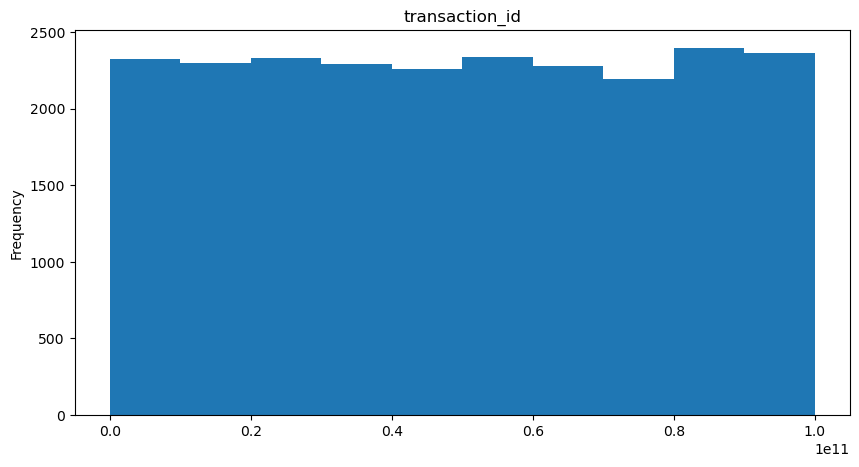

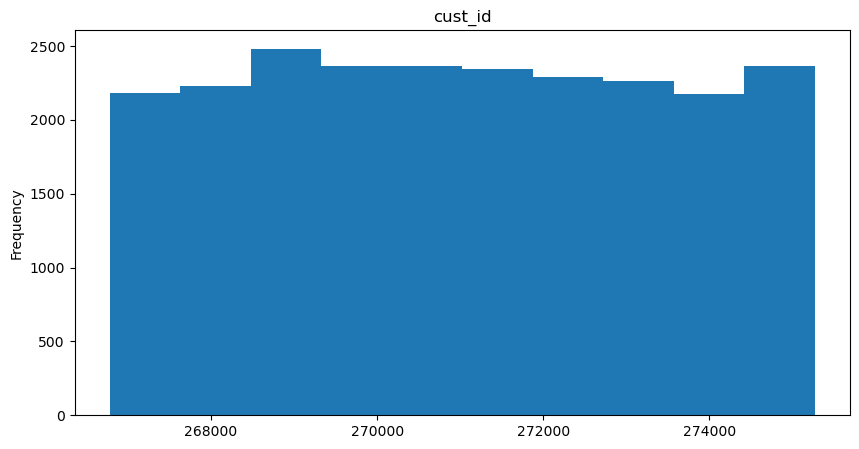

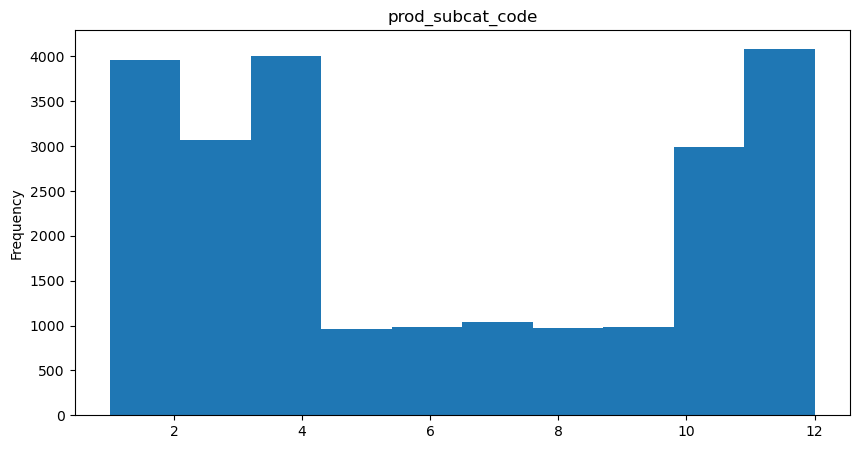

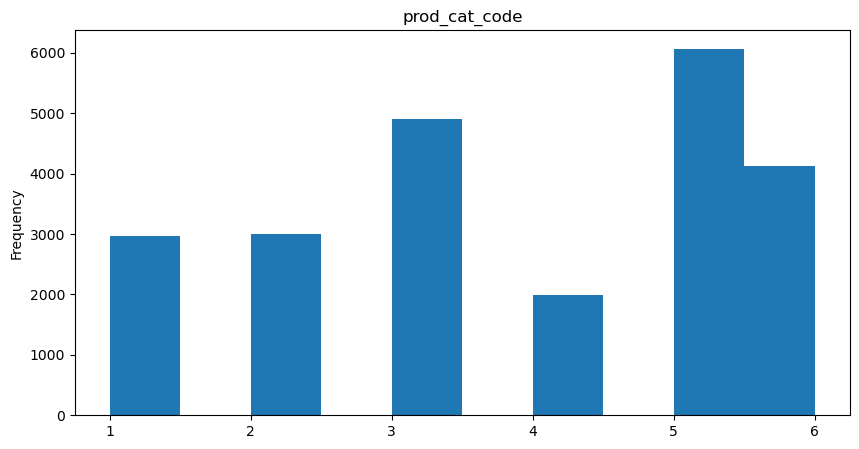

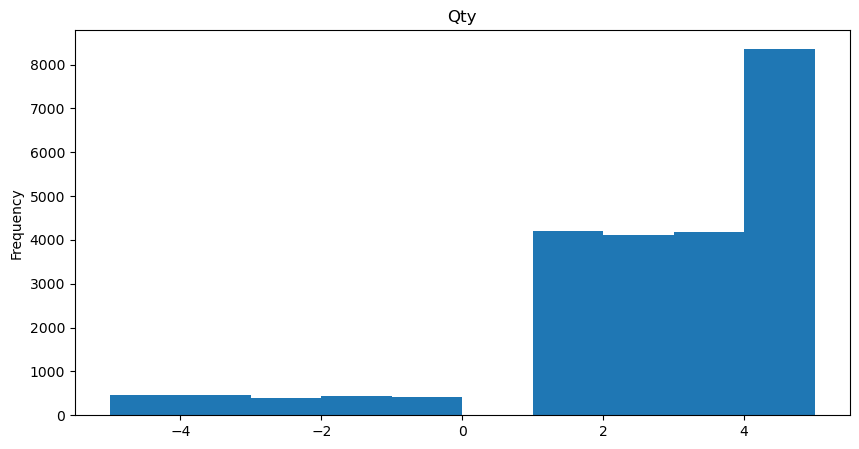

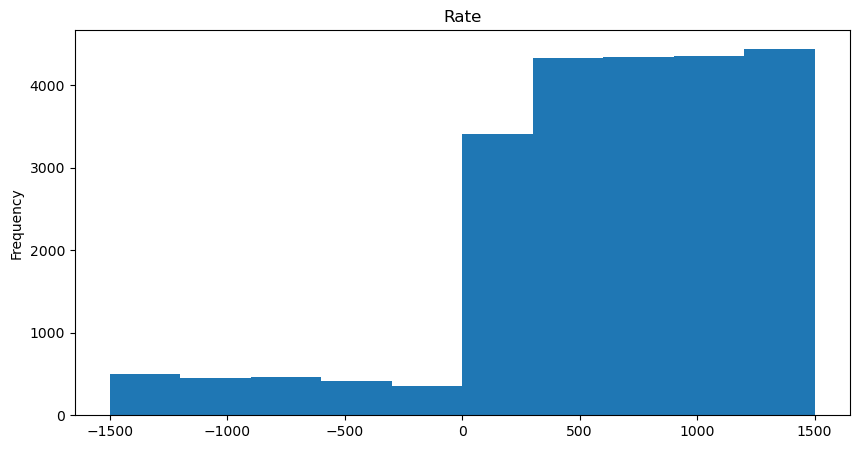

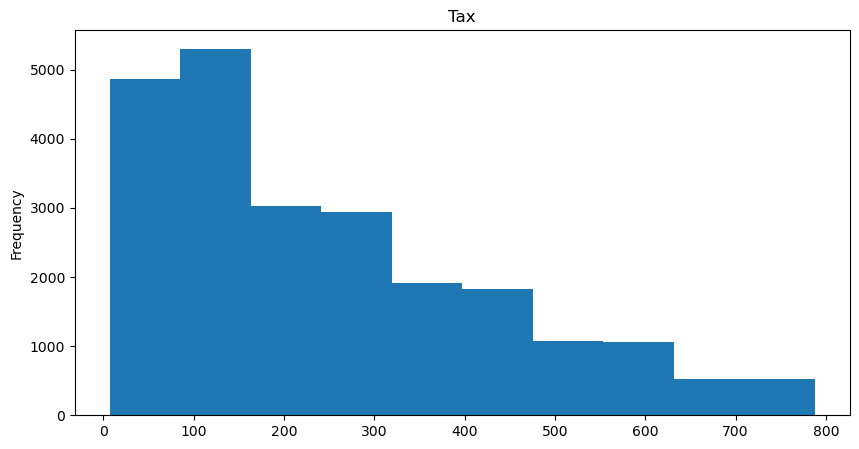

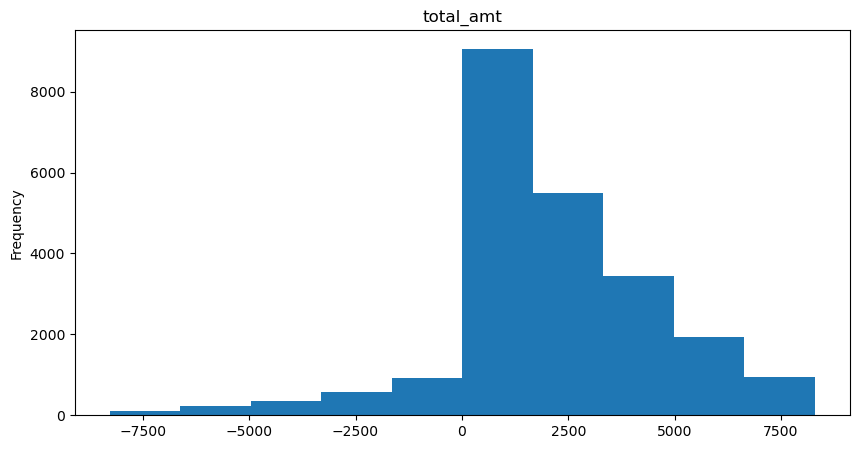

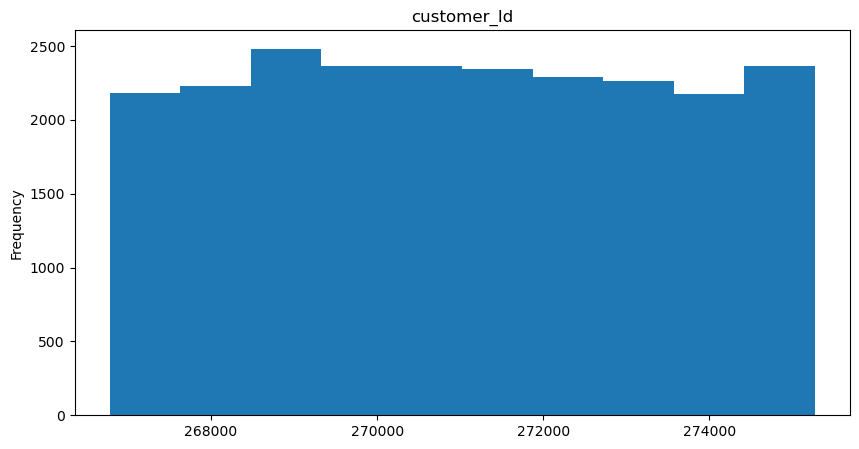

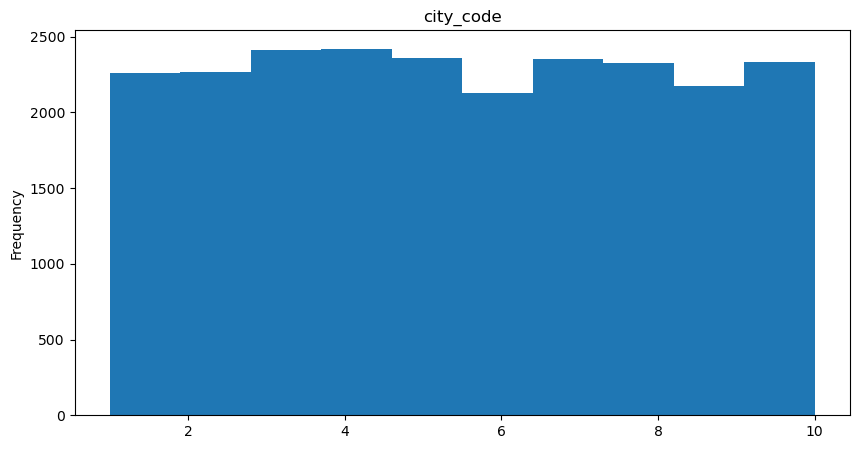

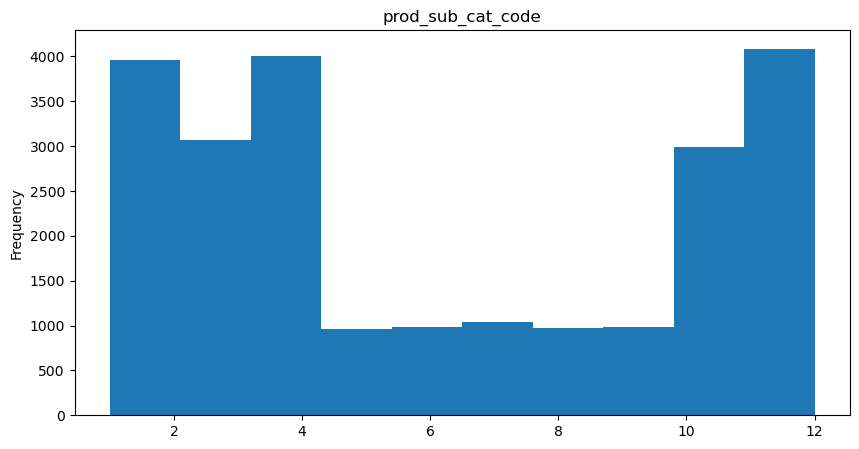

transaction_id       None
cust_id              None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
customer_Id          None
city_code            None
prod_sub_cat_code    None
dtype: object

In [16]:
customer_final.select_dtypes(['int64','float64']).apply(continuos_variables)

In [17]:
def categorical_variables(x):
    sns.countplot(x,linewidth=5,)
    plt.title(x.name)
    plt.show()

C:\Users\Kamakshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


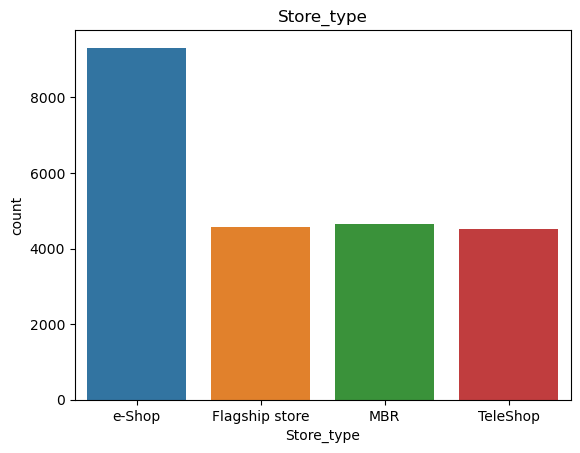

C:\Users\Kamakshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


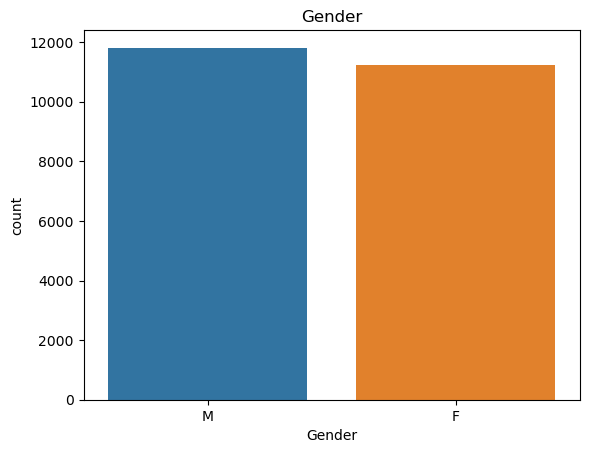

C:\Users\Kamakshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


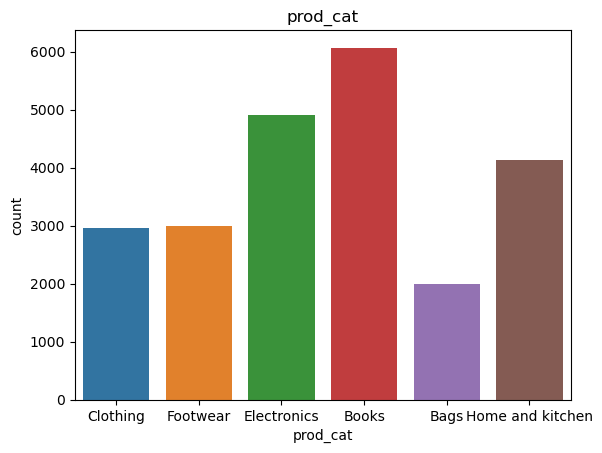

C:\Users\Kamakshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


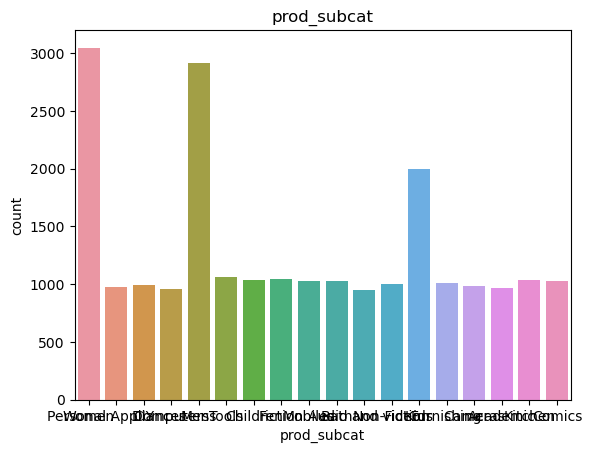

Store_type     None
Gender         None
prod_cat       None
prod_subcat    None
dtype: object

In [18]:
customer_final.select_dtypes(['object']).apply(categorical_variables)

In [19]:
# 4. a. Time period of available transaction data
timeperiod = max(customer_final.tran_date) - min(customer_final.tran_date)
timeperiod

Timedelta('1130 days 00:00:00')

##customer_final.tran_date.agg(['min','max'])

In [20]:
# 4. b. Count of transactions where the total amount of transaction was negative

customer_final.loc[customer_final.total_amt < 0][['transaction_id']].count()

transaction_id    2177
dtype: int64

In [21]:
# 5. Analyze which product categories are more popular among females vs male customers.

#morepopular = pd.pivot_table(data = customer_final,values='transaction_id',columns=['Gender','prod_cat'],aggfunc=len,sort=True).transpose()

morepopular = customer_final.groupby(by=['Gender','prod_cat'],sort=True)[['transaction_id']].count().sort_values(['Gender','transaction_id'],ascending=False)
morepopular

transaction_id
Gender prod_cat                        
M      Books                       3116
       Electronics                 2570
       Home and kitchen            2134
       Clothing                    1518
       Footwear                    1469
       Bags                        1004
F      Books                       2949
       Electronics                 2328
       Home and kitchen            1994
       Footwear                    1529
       Clothing                    1439
       Bags                         994

####  Buying Books is more popular in both Males and  Females .

In [23]:
# City code has the maximum customers 
# groupby , agg, nunique
cc = customer_final.groupby(['city_code','cust_id']).agg({'cust_id':'count'})
cc['count'] = customer_final.groupby(['city_code','cust_id']).agg({'cust_id':'count'})
cc = cc.sort_values('count',ascending=False)
cc['per'] = (cc['count'] / cc['cust_id'].sum()) * 100
cc

cust_id  count       per
city_code cust_id                          
7.0       268819        13     13  0.056411
6.0       269449        13     13  0.056411
          270831        12     12  0.052072
8.0       268663        12     12  0.052072
6.0       274227        12     12  0.052072
...                    ...    ...       ...
4.0       267902         1      1  0.004339
7.0       267312         1      1  0.004339
          267155         1      1  0.004339
10.0      268594         1      1  0.004339
1.0       266803         1      1  0.004339

[5504 rows x 3 columns]

In [24]:
# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

max_cust = customer_final.groupby('city_code',sort=True)[['cust_id']].nunique().sort_values('cust_id',ascending=False)
b = max_cust['cust_id'].sum()
max_cust['percentage']=(max_cust['cust_id'] / b ) *100
print(max_cust)

print('\nCity code 3 has maximum customers',max(max_cust.cust_id))

           cust_id  percentage
city_code                     
3.0            576   10.465116
5.0            570   10.356105
4.0            569   10.337936
7.0            563   10.228924
8.0            551   10.010901
2.0            546    9.920058
10.0           546    9.920058
1.0            535    9.720203
9.0            532    9.665698
6.0            516    9.375000

City code 3 has maximum customers 576


In [25]:
#7. Which store type sells the maximum products by value and by quantity?
maxprducts = customer_final.groupby(['Store_type','prod_cat'],sort=True)[['Qty','total_amt']].sum()
maxprducts.sort_values(['Qty','total_amt'],ascending=False).head(1)

,,Qty,total_amt
Store_type,prod_cat,,
e-Shop,Books,5974,5293443.935


In [26]:
print('\n e-shop sells maximum books product\n',maxprducts.max())


 e-shop sells maximum books product
 Qty             5974.000
total_amt    5293443.935
dtype: float64


In [27]:
# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
store_prod = customer_final.loc[(customer_final['Store_type'] == 'Flagship store') & ((customer_final['prod_cat'] == 'Electronics') | (customer_final['prod_cat'] == 'Clothing'))]

store_prod.groupby('prod_cat')[['total_amt']].sum()

,total_amt
prod_cat,
Clothing,1194423.23
Electronics,2215136.04


In [28]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?
M_electronics = customer_final.loc[(customer_final['prod_cat'] == 'Electronics') & (customer_final['Gender'] == 'M')]
M_electronics.groupby(['Gender','prod_cat'])[['total_amt']].sum()

,,total_amt
Gender,prod_cat,
M,Electronics,5703109.425


In [29]:
# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

unique_trans = customer_final.loc[customer_final['total_amt'] > 0]
unique_trans = unique_trans.groupby(['cust_id']).transaction_id.count().reset_index()
unique_trans.loc[unique_trans['transaction_id'] >10]

,cust_id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


In [30]:
# 11. For all customers aged between 25 - 35, find out:

customer_final['age'] = customer_final.DOB.apply(lambda x:int((dt.datetime.now()-x).days/365))
cust_final = customer_final.loc[(customer_final.age > 25) & (customer_final.age < 35)]
cust_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
7,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,1,Women,33
11,90954125896,269387,2013-03-18,1,1,4,839,352.380,3708.380,MBR,269387,1990-02-03,F,10.0,Clothing,1,Women,32
17,11999444239,268052,2012-06-18,1,1,2,1324,278.040,2926.040,Flagship store,268052,1988-12-18,M,7.0,Clothing,1,Women,34
23,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-02-03,M,6.0,Clothing,1,Women,30
24,42584381402,270625,2012-06-22,1,1,5,1371,719.775,7574.775,TeleShop,270625,1992-02-03,M,6.0,Clothing,1,Women,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23017,55267258802,270825,2011-12-24,4,4,5,690,362.250,3812.250,Flagship store,270825,1990-07-12,M,4.0,Bags,4,Women,32
23038,54823294459,274527,2011-03-20,4,4,1,1014,106.470,1120.470,Flagship store,274527,1991-02-10,F,8.0,Bags,4,Women,31
23043,3387244829,269114,2011-07-15,4,4,1,388,40.740,428.740,e-Shop,269114,1989-01-22,F,5.0,Bags,4,Women,34
23046,75339646315,274827,2011-05-02,4,4,4,1381,580.020,6104.020,e-Shop,274827,1988-12-27,F,8.0,Bags,4,Women,34


In [31]:
# 11. a. What was the total amount spent for “Electronics” and “Books” product categories?

electronics_books = cust_final.loc[(cust_final.prod_cat == 'Electronics') | (cust_final.prod_cat == 'Books')]
electronics_books.groupby(['prod_cat','age'])[['total_amt']].sum()

total_amt
prod_cat    age            
Books       30   557638.250
            31   505618.165
            32   448635.525
            33   554374.080
            34   578253.130
Electronics 30   424958.690
            31   395618.730
            32   373688.900
            33   580452.080
            34   471620.630

In [32]:
# 11. b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

cust_final = cust_final.loc[(cust_final.tran_date > pd.to_datetime('2014-01-01')) & (cust_final.tran_date < pd.to_datetime('2014-03-01'))]
cust_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
23,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-02-03,M,6.0,Clothing,1,Women,30
38,64939234724,270240,2014-01-29,1,1,4,644,270.480,2846.480,e-Shop,270240,1988-12-07,M,1.0,Clothing,1,Women,34
44,65582112405,267243,2014-02-08,1,1,-3,-1259,396.585,-4173.585,e-Shop,267243,1990-03-19,F,6.0,Clothing,1,Women,32
45,65582112405,267243,2014-01-29,1,1,3,1259,396.585,4173.585,e-Shop,267243,1990-03-19,F,6.0,Clothing,1,Women,32
59,51473331806,267794,2014-02-05,1,1,3,292,91.980,967.980,TeleShop,267794,1990-02-07,F,1.0,Clothing,1,Women,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22206,69724469724,271352,2014-01-14,4,4,1,861,90.405,951.405,MBR,271352,1992-07-18,M,8.0,Bags,4,Women,30
22226,70860726874,271749,2014-01-07,4,4,1,1056,110.880,1166.880,MBR,271749,1992-08-19,F,6.0,Bags,4,Women,30
22231,29498204760,271189,2014-01-05,4,4,3,1365,429.975,4524.975,e-Shop,271189,1990-08-13,M,9.0,Bags,4,Women,32
22233,48216532679,272975,2014-01-04,4,4,4,429,180.180,1896.180,Flagship store,272975,1988-05-15,F,5.0,Bags,4,Women,34
